In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [4]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
# df.iloc[:, 2:]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis= 1), df['Purchased'], test_size= 0.3, random_state= 0)

In [7]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [8]:
# X_test

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler= StandardScaler()

scaler.fit(X_train)

X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [11]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [12]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [13]:
X_train_scaled= pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [14]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [15]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


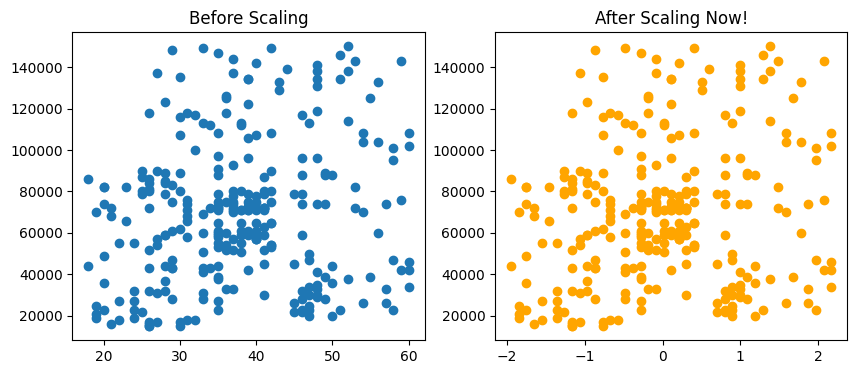

In [16]:
fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize= (10, 4))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train['EstimatedSalary'], color= 'orange')
ax2.set_title('After Scaling Now!')
plt.show()

In [17]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# sns.scatterplot(data=X_train, x='Age', y='EstimatedSalary', ax=ax1)
# ax1.set_title('Before Scaling')

# sns.scatterplot(data=X_train_scaled, x='Age', y='EstimatedSalary', ax=ax2, color='orange')
# ax2.set_title('After Scaling!')

# plt.show()

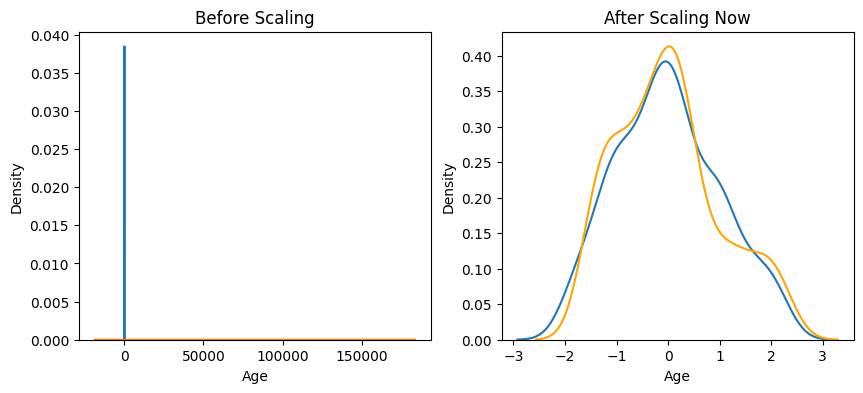

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize= (10, 4))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax= ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After Scaling Now')
sns.kdeplot(X_train_scaled['Age'], ax= ax2) 
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax= ax2, color= 'orange')
plt.show()

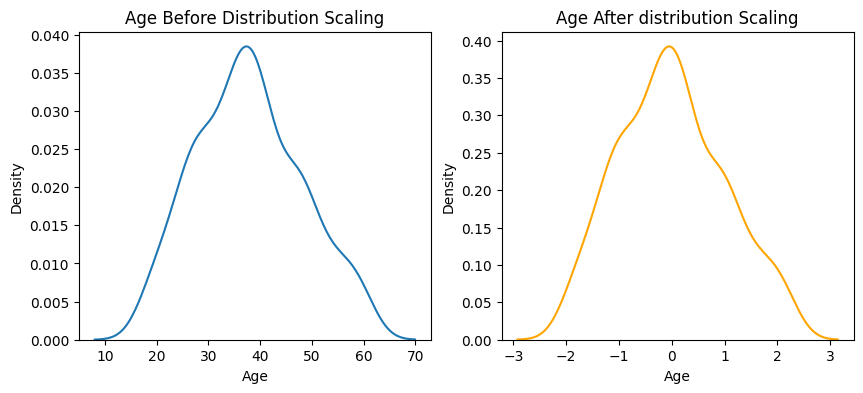

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize= (10, 4))

ax1.set_title('Age Before Distribution Scaling')
sns.kdeplot(X_train['Age'], ax= ax1)

ax2.set_title('Age After distribution Scaling')
sns.kdeplot(X_train_scaled['Age'], ax= ax2, color= 'orange')

plt.show()

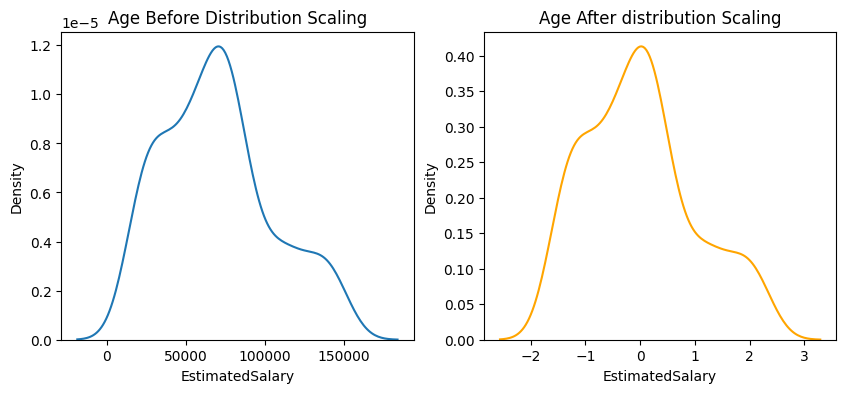

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize= (10, 4))

ax1.set_title('Age Before Distribution Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax= ax1)

ax2.set_title('Age After distribution Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax= ax2, color= 'orange')

plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()
lr_scaled= LogisticRegression()

In [23]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [24]:
y_pred = lr.predict(X_test)
y_pred_scaled= lr_scaled.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print('Actual Score: ', accuracy_score(y_test, y_pred))
print('Scaled: ', accuracy_score(y_test, y_pred_scaled))

Actual Score:  0.6583333333333333
Scaled:  0.8666666666666667


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt= DecisionTreeClassifier()
dt_scaled= DecisionTreeClassifier()

In [29]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [30]:
y_pred= dt.predict(X_test)
y_pred_scaled= dt_scaled.predict(X_test_scaled)

In [31]:
print('Actual Score: ', accuracy_score(y_test, y_pred))
print('Scaled Score: ', accuracy_score(y_test, y_pred_scaled))

Actual Score:  0.8666666666666667
Scaled Score:  0.875


In [32]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [33]:
# df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})],ignore_index=True)

In [34]:
# df

In [35]:
# plt.scatter(df['Age'], df['EstimatedSalary'])